## Pythonによる構造方程式モデリング（SEM）, 共分散構造分析入門

url : https://qiita.com/h-fkn/items/4a44559748e0ef4a2c4a

## はじめに

Pythonを使って構造方程式モデリング（Structural Equation Modeling, SEM）を実行する必要がありました。
しかし、参考となる日本語記事が皆無に近かったため、自分でまとめ記事を書くことにしました。

## 構造方程式モデリングとは

構造方程式モデリングとは、共分散構造分析とも呼ばれます。

SEM（えす・いー・えむ）と呼んだり、SEM（せむ）と呼ぶひとがいます。

## 構造方程式モデリングの歴史
1960年代から1970年代にかけて、コンピュータに実装するカタチで生まれたと言われています

## アルゴリズムの種類
    連立方程式回帰法
    反復最尤アルゴリズム
    反復正準相適合アルゴリズム
など、色々なアルゴリズムがあります。ここを深堀り始めると、もう戻ってこれなさそうです。
ですから、今回は割愛します。

## 構造方程式モデリングの魅力
個人的には、因子モデルと回帰モデルを同時に実行できることが最大の魅力だと思います。
また、「まず、こういうモデルであろう」と仮説モデルを立て、そのままモデルをプログラムにして実行できます。
つまり、頭で考えたことをすぐにカタチにできる柔軟性の高い分析手法ということです。
なので、議論を最小にして、繰り返し繰り返しSEMをおこない、モデルを洗練させていくことができます。

## 観測変数と潜在変数
構造方程式モデリングを実行するためには、観測変数と潜在変数という考え方を知っておく必要があります

## 観測変数
その名の通り、「観測できる変数」です。

具体的に言えば、大学での研究や実験、ビジネスで実際に収集できるデータのことを指します。

構造方程式モデリングの教科書によく出てくる事例は「文系学力」と「国語、数学…」などの科目です。

観測変数は、得点として観測できる「国語」や「数学」にあたります。

## 潜在変数
観測できる変数の背後に隠れている変数です。

これを因子モデルでは、因子（あるいは共通因子）と呼びます。

マッチングアプリでは、「年収」「職業」「住まい」「趣味」などのデータを収集（≒観測）できますが、その背後にある「モテるかどうか（モテ度）」は観測できません。

おそらく多くの人々が、なんとなく「モテるヒト（モテ度が高い人物）」がいることを認識しています。モテ度という指標がマッチングというモデルに組み込まれていると知っています。しかし、データとしては取得することがむずかしい。こういう変数を潜在変数といいます

## 実務への応用
そういうわけで、社会学・心理学などの簡単にデータとして取得できない変数（潜在変数）が必要な学術分野で活用されています。
実際のところ、ビジネスでもデータとして取得できないモノゴトが多いので、顧客理解やビジネス構造理解に応用できます。

## パス図

観測変数と潜在変数の違いがわかってきたら、パス図も理解する必要があります。
なぜならば、このパス図がいわゆる仮説モデル（たぶん、これとあれが関係していると思うんだよなぁー的な）の設計図になるからです。

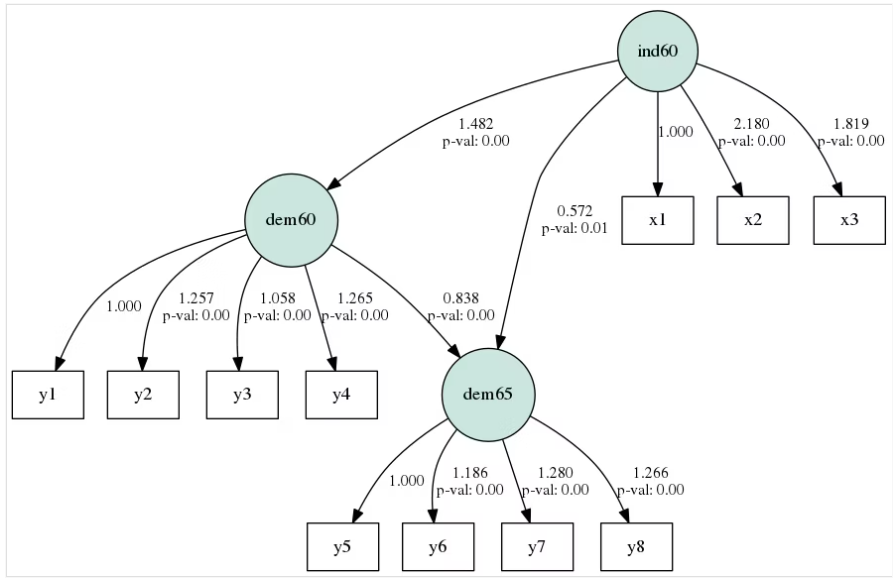

## パス図の書き方

    1.観測変数は四角形
    2.潜在変数は円・楕円形
    3.因果関係は単方向矢印（実践・直線が多い）
    4.共分散（相関関係）は双方向矢印（点線・曲線が多い）

まずは、変数を書いていきます。取得できるデータから図示していくと思うので、観測変数から書いていきます。

それらの観測変数がどんな見えない変数から導き出されているのかを考えます。
そして、導き出した変数に対して単方向の矢印を書きます。

上記のパス図では、y1, y2, y3, y4は背後にあるdem60から導き出された観測変数であると考えているため、潜在変数から観測変数に対して矢印が伸びています。また、図が複雑になるため、現時点では、共分散の矢印をプロットしていません。



## なぜ、semopyなのか？

ここまでの基礎知識があれば、だれもが構造方程式モデリングを遊べるでしょう。
実際に、semopyで遊んでみるまえに、そもそもなぜ今のタイミングでPythonでSEMなのでしょうか？

    機械学習モデルのライブラリが豊富なPythonは、SEMを実行できないという弱みがありました。

    統計数理モデルのライブラリは統計解析のプログラミング言語として強いRなどがあります。

    ですから、RやSPSSなどを使ってSEMを実行し、どうしてもPythonでやりたい場合は、フルスクラッチで書くかPypeRを使って力技でPythonとつなげる方法が主流でした。

    しかし、semopyがバージョン2.0となって実用性が高まりました。

これから、本ライブラリの利用者が増えていくと、使えるメソッドも増えていくと思います
そこで、semopyを使ってPython1本で構造方程式モデリングを実行してみます

## semopyを使って構造方程式モデリングを実行する

本当はオリジナルのデータセットを用意して遊んでみたいのですが、時間がないので、semopy: Structural Equation Modeling in Python のサンプルを使って、手順をまとめます。

url: https://semopy.com/

## 0. ライブラリのインストール

In [ ]:
# pipコマンドによるインストール
!pip install semopy

# gitコマンドによるインストール
# git clone https://gitlab.com/georgy.m/semopy

## 1. semopyをインポートする

as semと略称設定する場合は、semopyと書いてある部分はsemと書き換えてください

In [ ]:
# semopyをインポートする
import semopy as sem

# 仮説モデルをインスタンス化するModelもインポートする
from semopy import Model

from semopy import Modelを実行しなくても、正しく実行できました

## 2. データセットを用意する

今回はサンプルのデータセットを利用するので、下記のコードでサンプルデータを取得します。

In [ ]:
# semopyライブラリからサンプルデータをインポートする
from semopy.examples import political_democracy

# サンプルデータ取得し、dataに代入する
data = political_democracy.get_data()

data

,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679
...,...,...,...,...,...,...,...,...,...,...,...
71,5.40,9.999998,6.666666,3.333333,3.750000,6.666666,6.666666,1.485166,4.477337,3.091042,1.987909
72,7.50,8.800000,9.999998,6.066666,7.500000,6.666666,9.999998,6.666666,5.337538,5.631212,3.491004
73,7.50,7.000000,9.999998,6.852998,7.500000,6.348340,6.666666,7.508044,6.129050,6.403574,5.001796
74,10.00,6.666666,9.999998,10.000000,10.000000,6.666666,9.999998,10.000000,5.003946,4.962845,3.976994


## データ型変換

semopyは、データ型がfloat64でなければ正しく実行できません

データ型が違う場合は、型変換を行ったほうが良いでしょう

サンプルデータは型変換の必要がないので、そのまま進めます

In [ ]:
# データ型の確認
data.dtypes

,0
y1,float64
y2,float64
y3,float64
y4,float64
y5,float64
y6,float64
y7,float64
y8,float64
x1,float64
x2,float64


## 3. モデルを設定する

    仮説モデルの設定内容を確認する
サンプルデータでは、すでに仮説モデルを記述されています

get_mode()で仮説モデルの設定内容を取得します

変数descに代入し、print()してみましょう


In [ ]:
desc = political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


これらはすべてstr型（文字列）で記述します

Rでの記述方法とほとんど一緒です（回帰モデルの~の数が違ったりするので、すこし修正が必要です）

    仮説モデルを設定する

In [ ]:
# 仮説モデルを、変数descに代入する
desc = '''
    # measurement model
    ind60 =~ x1 + x2 + x3
    dem60 =~ y1 + y2 + y3 + y4
    dem65 =~ y5 + y6 + y7 + y8

    # regressions
    dem60 ~ ind60
    dem65 ~ ind60 + dem60

    # residual correlations
    y1 ~~ y5
    y2 ~~ y4 + y6
    y3 ~~ y7
    y4 ~~ y8
    y6 ~~ y8
    '''

str型で記述するということは、変数に代入するときに'''で囲めばいいというシンプルなお話です

    記述方法

記述方法を学ぶにあたって、データセットを深く理解する必要があります。
political_democracyとは、PoliticalDemocracy: Industrialization And Political Democracy Dataset in lavaan: Latent Variable Analysisこれを指すようです

url: https://rdrr.io/cran/lavaan/man/PoliticalDemocracy.html

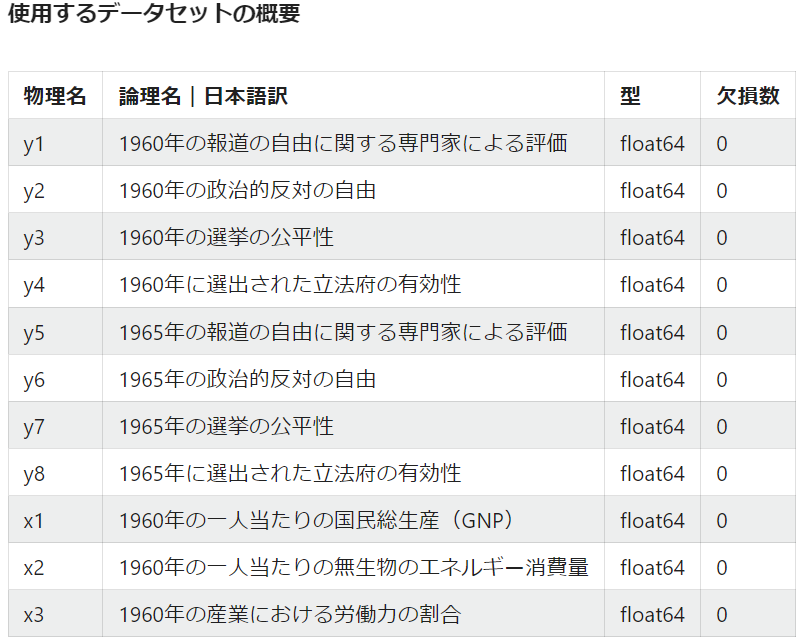

## 構造方程式｜潜在変数 =~ 観測変数

    1960年の産業（Industry1960, ind60）という潜在変数は、GNPとエネルギー消費量と労働力の割合という観測変数を導いている

    1960年の民主主義（Democracy1960, demo60）という潜在変数は、専門家による報道の評価、政治に反対できる自由度、選挙の公平性、政府の有効性という観測変数を導いている

    1966年の民主主義（Democracy1965, demo65）という潜在変数は、専門家による報道の評価、政治に反対できる自由度、選挙の公平性、政府の有効性という観測変数を導いている

# measurement model
    ind60 =~ x1 + x2 + x3
    dem60 =~ y1 + y2 + y3 + y4
    dem65 =~ y5 + y6 + y7 + y8


## 測定方程式｜変数（結果） ~ 変数（説明）

    1960年の産業（Industry1960, ind60）と1960年の民主主義（Democracy1960, demo60）は、同じ時期だから因果関係はあるだろう

    1965年の民主主義（Democracy1965, demo65）は、1960年の産業（Industry1960, ind60）
    と1960年の民主主義（Democracy1960, demo60）という過去のデータで説明できるだろう

# regressions
    dem60 ~ ind60
    dem65 ~ ind60 + dem60

## 残差相関｜変数 ~~ 変数

    1960年の報道の自由（y1）は1965年の報道の自由（y5）と相関があるだろう

    1960年の政治に反対できる自由度（y2）は同じ時期の選挙の公平性（y4）と1965年の政治に反対できる自由度（y6）で説明できるだろう などなど…

# residual correlations
    y1 ~~ y5
    y2 ~~ y4 + y6
    y3 ~~ y7
    y4 ~~ y8
    y6 ~~ y8

そんなわけで、仮説モデルを作りました。

## 4. 学習を実行する
semopyは下記の通り、いろいろなモジュールを持っています

In [ ]:
pip install see

In [ ]:
from see import see
see(sem)

    ismodule                help()                  .Model()
    .ModelEffects()         .ModelGeneralizedEffects()
    .ModelMeans()           .Optimizer()            .bias_correction()
    .calc_stats()           .constraints            .create_regularization()
    .efa                    .effects                .estimate_means()
    .examples               .gather_statistics()    .means
    .model                  .model_base             .model_effects
    .model_generalized_effects                      .model_generation
    .model_means            .multigroup             .name
    .optimizer              .parser                 .plot
    .polycorr               .regularization         .report()
    .semplot()              .solver                 .startingvalues
    .stats                  .unbias                 .utils

ですが、SEMを実行するだけなら、機械学習モデルを構築する手順とほぼ同様のプロセスなので、簡単です。



## model()｜使用するモデルを用意
Model()に仮説モデル（今回の場合はdesc）を引数にしてmod（modelの略）に代入します

In [ ]:
# 学習器を用意
mod = Model(desc)

## fit()｜学習を実行
学習（あるいは分析）に使用するデータを（今回はdata）を引数にして、結果はres（resultの略）に代入します

In [ ]:
# 学習結果をresに代入する
res = mod.fit(data)

# 学習結果を表示する
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.508
Number of iterations: 52
Params: 2.180 1.819 1.257 1.058 1.265 1.186 1.280 1.266 1.482 0.572 0.838 0.624 1.893 1.320 2.156 7.385 0.793 5.067 0.347 3.148 1.357 4.954 3.951 0.172 0.448 0.082 0.120 0.467 2.352 3.430 3.256


## 5. 学習結果を評価する
insepect()｜パラメーターの推定値を調べる

In [ ]:
# 学習結果のパラメータ一覧を表示する
inspect = mod.inspect()
display(inspect)

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,dem60,~,ind60,1.482379,0.399024,3.715017,0.000203
1,dem65,~,ind60,0.571912,0.221383,2.583364,0.009784
2,dem65,~,dem60,0.837574,0.098446,8.507992,0.0
3,x1,~,ind60,1.000000,-,-,-
4,x2,~,ind60,2.180494,0.138565,15.736254,0.0
5,x3,~,ind60,1.818546,0.151993,11.96465,0.0
6,y1,~,dem60,1.000000,-,-,-
7,y2,~,dem60,1.256819,0.182687,6.879647,0.0
8,y3,~,dem60,1.058174,0.151521,6.983699,0.0
9,y4,~,dem60,1.265186,0.145151,8.716344,0.0


## calc_stats()｜適合度を表示する

In [ ]:
# 適合度を表示する
stats = sem.calc_stats(mod)
print(stats)

       DoF  DoF Baseline       chi2  chi2 p-value  chi2 Baseline       CFI  \
Value   35            55  38.125446      0.329171     730.654577  0.995374   

           GFI      AGFI      NFI       TLI     RMSEA        AIC         BIC  \
Value  0.94782  0.918003  0.94782  0.992731  0.034738  60.983321  132.825453   

         LogLik  
Value  0.508339  


In [ ]:
# 見づらいので、転置する
print(stats.T)

                    Value
DoF             35.000000
DoF Baseline    55.000000
chi2            38.125446
chi2 p-value     0.329171
chi2 Baseline  730.654577
CFI              0.995374
GFI              0.947820
AGFI             0.918003
NFI              0.947820
TLI              0.992731
RMSEA            0.034738
AIC             60.983321
BIC            132.825453
LogLik           0.508339


## 6. パス図を出力する
シンプルな棒グラフや散布図であれば、Matplotlibでいいのですが、パス図はノードとエッジからなるグラフです。

そのため、Graphvizをインポートして、パス図を出力します。

## Graphvizをインストール


In [ ]:
# pipコマンドの例
!pip install graphviz

## semplot()｜パス図を出力する
semplotは第一引数に利用するモデルを指定し（今回はmod）、第二引数に出力するファイル名を指定します

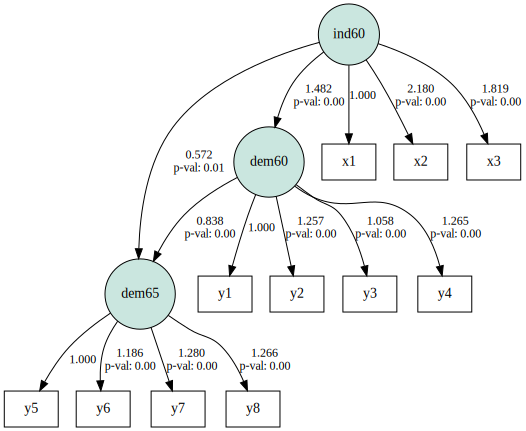

In [ ]:
g = sem.semplot(mod, "sample.png")

g

## 共分散も表示する
引数に、plot_covs=Trueをとると、共分散関係の矢印も点線でプロットされます

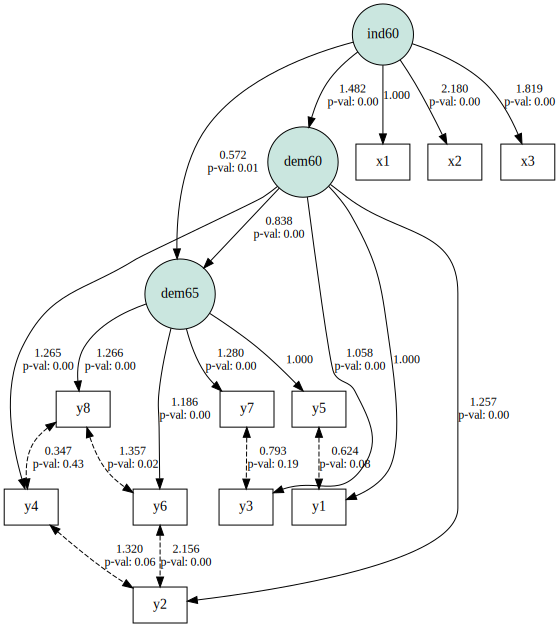

In [ ]:
g = sem.semplot(mod, "sample.png", plot_covs=True)
g

## レイアウトを変える
引数に、engine="circo"をとると、図示方法がサークル型（円型）に変わります
デフォルトはengine="dot"の階層型です

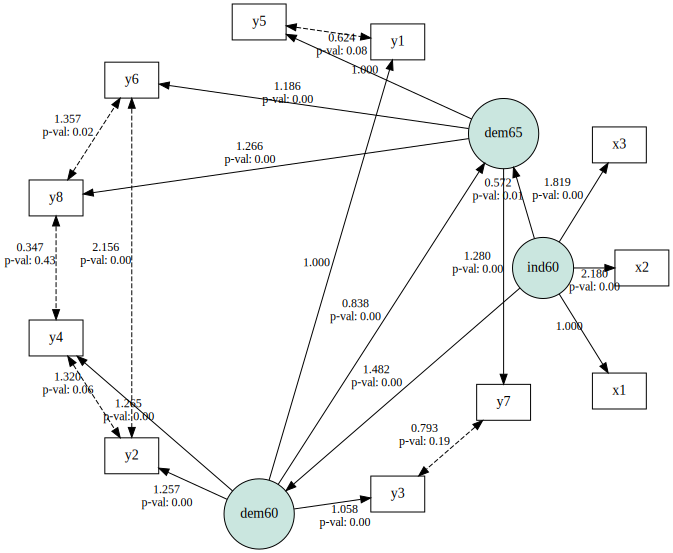

In [ ]:
g = sem.semplot(mod, "sample.png", plot_covs=True, engine="circo")
g

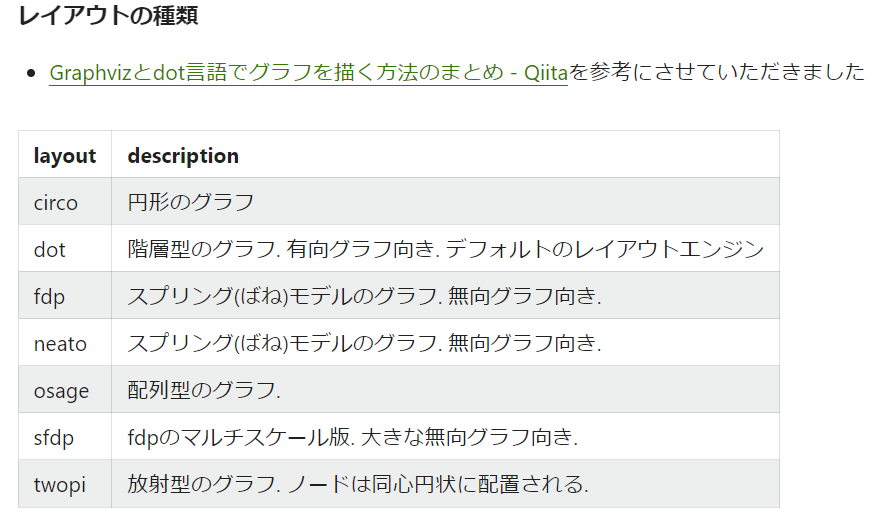

url: https://qiita.com/rubytomato@github/items/51779135bc4b77c8c20d

## 所感
これは一番乗りだろうと思い、semopyをいじってみると、すでにPythonで構造方程式モデリング (SEM) 〜semopyのチュートリアルを試してみる〜 - Qiitaという記事があり、先に実践していた方がいらっしゃいました

上記の記事もとても参考になりました。

パス図については誤差変数が出力されない点がまだ解決されておらず、描画機能は以前Rのほうが強い印象です。

上記は、semopyのドキュメントを見ると解決策があるかもしれません。
Pythonで構造方程式モデリング（SEM）をやってみよう！という人の参考になれば嬉しいです。

おわり

url: https://qiita.com/roki18d/items/6d923d4319e2048885fa

## 参考文献

    semopy: Structural Equation Modeling in Python
    url: https://semopy.com/index.html

    Introduction - semopyチュートリアル
    url: https://semopy.com/tutorial.html

    PoliticalDemocracy: Industrialization And Political Democracy Dataset in lavaan: Latent Variable Analysis    
    url: https://rdrr.io/cran/lavaan/man/PoliticalDemocracy.html

    Graphvizとdot言語でグラフを描く方法のまとめ - Qiita
    url: https://qiita.com/rubytomato@github/items/51779135bc4b77c8c20d

    Pythonで構造方程式モデリング (SEM) 〜semopyのチュートリアルを試してみる〜 - Qiita
    url: https://qiita.com/roki18d/items/6d923d4319e2048885fa

In [ ]:
https://www.macromill.com/service/data-analysis/sem-covariance-structure-analysis/?uuid=20240811_7e42d753_f5fc_4a34_a96f_0792b49d3404

In [ ]:
https://gmo-research.ai/research-column/path-analytics

In [ ]:
SEMを使用したいんだけど、以下は合ってるの?

・パス図を基にして仮説モデルを記述する
・3パターンに分けて書きます
   ∟構造方程式｜潜在変数 =~ 観測変数
   ∟測定方程式｜変数（結果） ~ 変数（説明）
   ∟残差相関｜変数 ~~ 変数

ChatGPT
メモリを更新しました
あなたの説明は概ね正しいです。以下に詳細を補足します。

SEMを使用する際のステップ
パス図を基にして仮説モデルを記述する

SEMでは、最初に理論や先行研究に基づいて仮説モデルを作成します。この仮説モデルは、パス図として視覚的に表現され、変数間の因果関係を明示します。
3つのパターンに分けて書く

構造方程式（Structural Equation）

これは、潜在変数（測定できない概念）と観測変数（実際に測定されたデータ）との関係を表します。潜在変数は複数の観測変数から構成されます。
記述方法: 潜在変数 =~ 観測変数1 + 観測変数2 + ...
例: Intelligence =~ Math_Score + Verbal_Score + ...
測定方程式（Measurement Equation）

測定方程式は、潜在変数間、または観測変数間の回帰関係を表します。これによって、ある変数が他の変数に与える影響を測定します。
記述方法: 結果変数 ~ 説明変数1 + 説明変数2 + ...
例: Job_Satisfaction ~ Work_Life_Balance + Salary
残差相関（Residual Correlation）

残差相関は、2つの変数間に相関があるが、モデルに含まれていない潜在的な要因を表します。これは、モデルに明示的には含まれていないが、説明しきれない部分を表すために使います。
記述方法: 変数1 ~~ 変数2
例: Error1 ~~ Error2
まとめ
パス図: 仮説モデルの視覚的表現。
構造方程式: 潜在変数と観測変数の関係。
測定方程式: 変数間の回帰関係。
残差相関: モデルに含まれないが、相関のある要素を表現。
このように仮説を設定し、SEMを使ってモデルを構築・検証していく流れは一般的なアプローチです。

In [ ]:
SEMを使ってモデルを構築・検証していく流れの概略を教えて

ChatGPT
SEM（構造方程式モデリング）を使用してモデルを構築・検証する流れは、いくつかのステップに分けられます。以下に、SEMのプロセスの概略を示します。

1. 理論の構築と仮説の設定
理論の基礎:
研究対象に関する理論や既存の研究に基づいて、変数間の関係性を仮定します。
仮説の設定:
潜在変数（測定できない概念）や観測変数（実際に測定されるデータ）の関係性に基づいて仮説を設定します。これに基づいて、因果関係や相関関係を仮定します。
2. パス図の作成
パス図の設計:
仮説を視覚化するために、パス図（Path Diagram）を作成します。パス図では、潜在変数、観測変数、およびこれらの間の関係を矢印で示します。
潜在変数は楕円で、観測変数は四角で表すのが一般的です。
3. モデルの記述
構造モデルの定義:
パス図に基づいて、構造方程式モデルを数式で記述します。これには、構造方程式、測定方程式、残差相関の指定が含まれます。
ソフトウェアでの入力:
SEM専用のソフトウェアやPythonのライブラリ（例：lavaan、semopy、R、AMOS）を使って、モデルを入力します。
4. データの収集と準備
データ収集:
モデルに必要なデータを収集します。データには、仮説に関連するすべての観測変数が含まれている必要があります。
データの前処理:
欠損値処理、正規化、スケーリングなど、データを分析に適した形に整えます。
5. モデルの推定
パラメータ推定:
ソフトウェアを使って、モデルのパラメータ（回帰係数、因子負荷量など）を推定します。最大尤度法（ML）や最小二乗法（LS）などの手法が使用されます。
6. モデルの評価
適合度指標の確認:
モデルがデータにどれだけ適合しているかを評価するために、適合度指標（例：CFI、TLI、RMSEA、SRMRなど）を確認します。
仮説の検証:
仮説がデータに基づいて支持されるかどうかを評価します。パラメータ推定値が期待通りの値であり、統計的に有意であるかを確認します。
7. モデルの修正
モデルの改善:

適合度が低い場合や仮説が支持されない場合、パス図を見直し、モデルを修正します。残差相関を追加したり、新たなパスを導入したりすることがあります。
モデルの再推定:

修正したモデルを再度推定し、適合度を評価します。このプロセスを繰り返して、モデルを洗練させます。
8. 最終モデルの解釈と報告
最終モデルの解釈:

最終的に適合度の高いモデルが得られたら、そのモデルに基づいて結論を導きます。どの仮説が支持されたか、どの変数が重要であるかを解釈します。
結果の報告:

最終モデルの構造、パス係数、適合度指標、解釈などを含めて、研究結果を報告します。
まとめ
SEMを使ったモデル構築と検証の流れは、理論に基づく仮説の設定から始まり、モデルの記述、データの収集と前処理、モデルの推定、評価、修正、そして最終的な解釈と報告までの一連のプロセスです。このプロセスを通じて、複雑な因果関係や構造を解析し、理論的な仮説を検証することができます